In [51]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
import os
from textblob import TextBlob


# pip3 install newspaper3k to get a list of all articles on the homepage of a newspaper
from newspaper import build
from newspaper import Article

In [18]:
urls = []
urls_set = set()
independent_articles = build("https://www.independent.ie/", memoize_articles=False)
for article in independent_articles.articles:
    # check to see if the article url is not within the urls_set
    if article.url not in urls_set:
        # add the unique article url to the set
        urls_set.add(article.url)
        urls.append(article.url)

In [20]:
articles = []
for i in urls:
    if i.endswith('html'):
        articles.append(i)

print(articles[:10])
print(len(articles))

['https://www.independent.ie/news/environment/turn-down-heating-and-use-washing-machines-dryers-and-cookers-outside-peak-hours-cabinet-energy-plan-for-households-41964476.html', 'https://www.independent.ie/irish-news/education/dcu-appeals-to-alumni-to-rent-out-room-to-current-student-as-accommodation-crisis-worsens-41965642.html', 'https://www.independent.ie/irish-news/health/uptake-of-flu-jab-among-hospital-staff-fell-sharply-last-winter-figures-show-41965485.html', 'https://www.independent.ie/news/environment/christmas-lights-and-office-heating-in-firing-line-to-cut-public-sector-energy-bills-41965443.html', 'https://www.independent.ie/sport/gaelic-games/gaelic-football/while-brian-odriscoll-struggled-to-adjust-to-the-dimming-of-the-lights-paul-mannion-seems-content-in-the-silent-season-41965425.html', 'https://www.independent.ie/world-news/europe/britain/liz-truss-becomes-uk-prime-minister-after-queen-invites-her-to-form-new-government-41965325.html', 'https://www.independent.ie/new

In [22]:
my_article = Article(articles[1], language="en")
my_article.download()
my_article.parse()
my_article.nlp()
print(my_article.title)

DCU appeals to alumni to rent out room to current student as accommodation crisis worsens


In [24]:
print(my_article.summary)

GAA star Ross Munnelly, the director of alumni relations at DCU, warned that students are facing long daily commutes and won’t be able to “fully engage with the DCU student experience”.
The Sunday Independent reported that just 600 new student accommodation beds are to be built in Dublin this year, down over half from 1,350 built last year, according to research by commercial estate agents Cushman & Wakefield.
The figures were down on the 2,300 built in both 2018 and 2019, fuelling fears of purpose-built student accommodation in Dublin drying up.
Opposition TDs have warned the Government that young people are being forced out of university education by the housing crisis.
More than three-quarters (77pc) of students surveyed said that accommodation issues have impacted their ability to do their course work.


In [25]:
print(my_article.keywords)

['shared', 'current', 'rent', 'education', 'appeals', 'college', 'dcu', 'accommodation', 'crisis', 'young', 'alumni', 'students', 'place', 'worsens', 'student', 'room', 'hours']


In [26]:
text = TextBlob(my_article.text)

textblob_sentiment=[]
a= text.sentiment.polarity
b= text.sentiment.subjectivity
textblob_sentiment.append([my_article.text,a,b])

Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment. Subjectivity is the output that lies within [0,1] and refers to personal opinions and judgments.

In [27]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,DCU says its students may have to defer their ...,0.033573,0.391583


In [42]:
textblob_sentiment=[]

for i in articles:
    my_article = Article(i, language="en")
    my_article.download()
    my_article.parse()
    my_article.nlp()
    text = TextBlob(my_article.text)
    a= text.sentiment.polarity
    b= text.sentiment.subjectivity
    textblob_sentiment.append([my_article.text,a,b])

df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,THE public are to be advised to use washing ma...,0.048900,0.385246
1,DCU says its students may have to defer their ...,0.043497,0.393889
2,Uptake of the flu vaccine among hospital staff...,0.013832,0.279451
3,CHRISTMAS lights may have to be dimmed this wi...,0.107025,0.482238
4,"For Brian O’Driscoll, the hardest thing to adj...",0.134412,0.471558


In [43]:
print(len(df_textblob))

254


Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

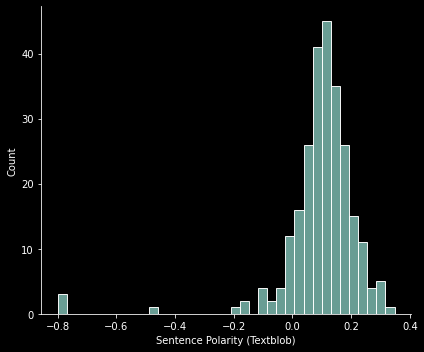

In [44]:
plt.style.use('dark_background')
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.2)
plt.xlabel("Sentence Polarity (Textblob)")

Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment. 

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

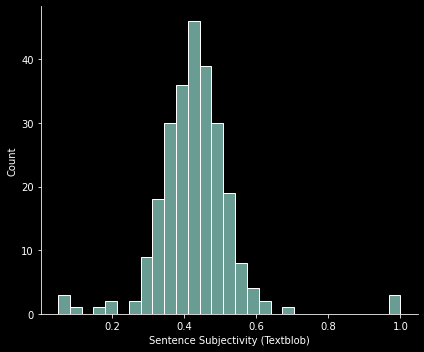

In [45]:
plt.style.use('dark_background')
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.2)
plt.xlabel("Sentence Subjectivity (Textblob)")

Subjectivity is the output that lies within [0,1] and refers to personal opinions and judgments.

In [54]:
my_article = Article(articles[1], language="en")
my_article.download()
my_article.parse()
my_article.nlp()
print(my_article.title)

words = my_article.keywords
print(words)

DCU appeals to alumni to rent out rooms to current students as accommodation crisis worsens
['shared', 'current', 'rent', 'education', 'rooms', 'appeals', 'college', 'dcu', 'accommodation', 'crisis', 'young', 'alumni', 'students', 'place', 'student', 'worsens', 'hours']


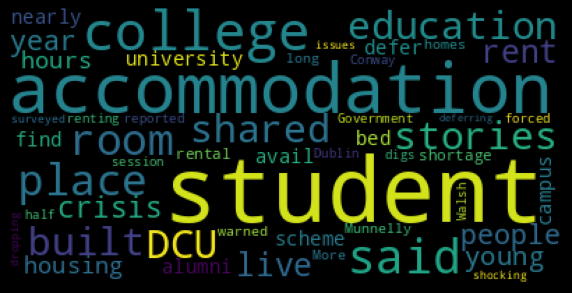

GAA star Ross Munnelly, the director of alumni relations at DCU, warned that students are facing long daily commutes and won’t be able to “fully engage with the DCU student experience”.
Read MoreThe college is encouraging people with spare rooms in their homes to avail of Revenue’s rent-a-room scheme.
The Sunday Independent reported that just 600 new student accommodation beds are to be built in Dublin this year, down over half from 1,350 built last year, according to research by commercial estate agents Cushman & Wakefield.
The figures were down on the 2,300 built in both 2018 and 2019, fuelling fears of purpose-built student accommodation in Dublin drying up.
More than three-quarters (77pc) of students surveyed said that accommodation issues have impacted their ability to do their course work.


In [55]:
# Wordcloud
text = my_article.text

# stopwords is simply a set of words to be eliminated
# if STOPWORDS not manually set, then this default list will be used
stopwords = set(STOPWORDS)
#if you want to add to the stopwords list, here I add some news sources
stopwords.update(['s','t','rt','co','abc','nbc','cbs','nytimes'])
# Create and generate a basic word cloud image:
wordcloud = WordCloud(stopwords=stopwords,max_words=50,background_color="black").generate(text)
# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
print(my_article.summary)

Let's look into other sentiment analysis models. 

https://huggingface.co/models?pipeline_tag=text-classification&sort=downloads&search=sentiment

There are more than 215 sentiment analysis models publicly available on the Hub and integrating them with Python just takes 5 lines of code.
This code snippet uses the pipeline class to make predictions from models available in the Hub. It uses the default model for sentiment analysis to analyze the list of texts data and it outputs the following results:

In [57]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = articles[:10]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


[{'label': 'NEGATIVE', 'score': 0.9894256591796875},
 {'label': 'NEGATIVE', 'score': 0.9969049096107483},
 {'label': 'NEGATIVE', 'score': 0.9996961355209351},
 {'label': 'NEGATIVE', 'score': 0.9882470965385437},
 {'label': 'NEGATIVE', 'score': 0.9966811537742615},
 {'label': 'POSITIVE', 'score': 0.7473571300506592},
 {'label': 'NEGATIVE', 'score': 0.7283477187156677},
 {'label': 'NEGATIVE', 'score': 0.9136469960212708},
 {'label': 'NEGATIVE', 'score': 0.9997991919517517},
 {'label': 'NEGATIVE', 'score': 0.9407086968421936}]